# [2. Accessing Text Corpora and Lexical Resources](https://www.nltk.org/book/ch02.html)

Run the cell below before running any other code.

In [364]:
import nltk

## 1 - Accessing Text Corpora

### 1.1 - Guterberg Corpus

In [ ]:
nltk.corpus.gutenberg.fileids()

In [ ]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
type(emma)

In [ ]:
len(emma)

* notice that emma is a `nltk.corpus.reader.util.StreamBackedCorpusView` object
* in order to use the `.concordance` method on the `emma` text, we need to convert `emma` into a `nltk.text.Text` object, as shown below

In [ ]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
type(emma)

In [ ]:
emma.concordance("surprize")

In [ ]:
from nltk.corpus import gutenberg

In [ ]:
gutenberg.fileids()

In [ ]:
emma = gutenberg.words('austen-emma.txt')

In [ ]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

#### Macbeth Sentences

In [ ]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')

In [ ]:
macbeth_sentences

In [ ]:
macbeth_sentences[1116]

In [ ]:
longest_len = max(len(s) for s in macbeth_sentences)

In [ ]:
[s for s in macbeth_sentences if len(s) == longest_len]

### 1.2 - Web and Chat Text

In [ ]:
from nltk.corpus import webtext

for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

In [ ]:
from nltk.corpus import nps_chat

chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

### 1.3 Brown Corpus

In [ ]:
from nltk.corpus import brown

In [ ]:
brown.categories()

In [ ]:
brown.words(categories='news')

In [ ]:
brown.words(fileids=['cg22'])

In [ ]:
brown.sents(categories=['news', 'editorial', 'reviews'])

#### Stylistics

In [ ]:
from nltk.corpus import brown

In [ ]:
news_text = brown.words(categories='news')

In [ ]:
fdist = nltk.FreqDist(w.lower() for w in news_text)

In [ ]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [ ]:
for m in modals:
    print(m + ':', fdist[m], end=' ')

**Your Turn:** Choose a different section of the Brown Corpus, and adapt the previous example to count a selection of wh words, such as what, when, where, who, and why.

#### CFD Sneak Peek

* CFD's will be explained in more detail in Section 2

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

### 1.4 - Reuters Corpus

In [ ]:
from nltk.corpus import reuters

In [ ]:
reuters.fileids()

In [ ]:
reuters.categories()

In [ ]:
reuters.categories('training/9865')

In [ ]:
reuters.categories(['training/9865', 'training/9880'])

In [ ]:
reuters.fileids('barley')

In [ ]:
reuters.fileids(['barley', 'corn'])

### 1.5 - Inaugural Address Corpus

In [ ]:
from nltk.corpus import inaugural

In [ ]:
inaugural.fileids()

In [ ]:
[fileid[:4] for fileid in inaugural.fileids()]

Pay attention to how this graph varies from the graph displayed in the book. NLTK's Inaugral Address Corpus is still updated, so data from United States presidents past 2005 are included in this graph.

* **note:** for this solution, I used matplotlib library functions to change the size of the graph
    * learn more about matplotlib here: [Intro to pyplot Tutorial](https://matplotlib.org/3.3.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
* CFD's will be explained in more detail in Section 2

In [ ]:
import matplotlib.pyplot as plt

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

plt.figure(figsize=(16, 6)) 

cfd.plot()

### 1.7 - Corpora in Other Languages

In [ ]:
nltk.corpus.cess_esp.words()

In [ ]:
nltk.corpus.floresta.words()

In [ ]:
nltk.corpus.indian.words('hindi.pos')

In [ ]:
nltk.corpus.udhr.fileids()

In [ ]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

* **note:** for this solution, I used matplotlib library functions to change the size of the graph
    * learn more about matplotlib here: [Intro to pyplot Tutorial](https://matplotlib.org/3.3.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
* CFD's will be explained in more detail in Section 2

In [ ]:
import matplotlib.pyplot as plt
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

plt.figure(figsize=(10, 6)) 

cfd.plot(cumulative=True)

**Your Turn:** Pick a language of interest in `udhr.fileids()`, and define a variable `raw_text = udhr.raw(Language-Latin1)`. Now plot a frequency distribution of the letters of the text using `nltk.FreqDist(raw_text).plot()`.

### 1.8 - Text Corpus Structure

In [ ]:
from nltk.corpus import gutenberg

raw = gutenberg.raw("burgess-busterbrown.txt")

raw[1:20]

In [ ]:
words = gutenberg.words("burgess-busterbrown.txt")

In [ ]:
words[1:20]

In [ ]:
sents = gutenberg.sents("burgess-busterbrown.txt")

In [ ]:
sents[1:20]

### 1.9 - Loading your own Corpus

In this example, we are going to look at the root directory of this reposity. The `..` stands for a **parent directory**, or a folder one level higher in the folder hierarchy. See [Section 1.4 of this Unix Tutorial](http://www.ee.surrey.ac.uk/Teaching/Unix/unix1.html) for an in depth explanation of this.

And instead of looking at all of the files that have a `.` in them, we will observe all of the files that end with `.md`. These are markdown files, which are a type of text file.

* **Note:** if you are using Google Colab, change the corpus_root string to 'sample_data'. Click the folder icon on the left to see what's in the 'sample_data' folder.

In [ ]:
from nltk.corpus import PlaintextCorpusReader

corpus_root = '../' # change this string to 'sample_data' if using Google Colab
wordlists = PlaintextCorpusReader(corpus_root, '.*.md') 
wordlists.fileids()

In [ ]:
wordlists.words('README.md')

Unfortunately the Penn Treebank is [not a free resource](https://catalog.ldc.upenn.edu/LDC99T42). Fortunately there are a lot of [free alternatives to use](https://stackoverflow.com/q/8949517/12578069).

* [American National Corpus](http://www.anc.org/data/masc/downloads/data-download/)

## 2 - Conditional Frequency Distributions

### 2.1 - Conditions and Events

In [ ]:
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County')]

pairs

### 2.2 - Counting Words by Genre

In [ ]:
from nltk.corpus import brown

cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

The technique used to create the list of pairs below is called a **list comprehension**. Below are review resources for this technique:

* *Chapter 1, Section 3.2* of the NLTK book
* [Tutorial on List Comprehensions](https://www.programiz.com/python-programming/list-comprehension)

In [ ]:
genre_word = [(genre, word)
               for genre in ['news', 'romance']         
               for word in brown.words(categories=genre)]

len(genre_word)

In [ ]:
genre_word[:4] # [_start-genre]

In [ ]:
genre_word[-4:] # [_end-genre]

In [ ]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

In [ ]:
cfd.conditions() # [_conditions-cfd]

* **samples** are the number of unique words there are in a text (i.e. no duplicate words are counted)
* **outcomes** are the total number of words occuring in a text (i.e. including duplicate words)

In [ ]:
print(cfd['news'])

In [ ]:
print(cfd['romance'])

In [ ]:
cfd['romance'].most_common(20)

The code below shows how many times does the word *could* appear in romance texts (in the *Brown Corpus*).

In [ ]:
cfd['romance']['could']

### 2.3 - Plotting and Tabulating Distributions

In [ ]:
from nltk.corpus import inaugural

cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4]) 
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen'] if w.lower().startswith(target))

In [ ]:
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in udhr.words(lang + '-Latin1'))

In [ ]:
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(10), cumulative=True)

**Your Turn:** Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called `days` containing a list of days of the week, i.e. `['Monday', ...]`. Now tabulate the counts for these words using `cfd.tabulate(samples=days)`. Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: `samples=['Monday', ...]`.

### 2.4 - Generating Random Text with Bigrams

In [ ]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']

In [ ]:
list(nltk.bigrams(sent))

**Figure 2.2**: Generating Random Text: this program obtains all bigrams from the text of the book of Genesis, then constructs a conditional frequency distribution to record which words are most likely to follow a given word; e.g., after the word *living*, the most likely word is *creature*; the `generate_model()` function uses this data, and a seed word, to generate random text.

In [ ]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()
        

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [ ]:
cfd['living']

In [ ]:
generate_model(cfd, 'living')

## 3 - More Python: Reusing Code

**Note:** If you are using Google Colab, run the cell below before running the cells. This will download the `hello.py` and `text_proc.py` files that you will use in these exercises. Click the folder icon on the left to see the files you have downloaded.

In [ ]:
!wget --no-check-certificate https://raw.githubusercontent.com/BetoBob/NLTK-Book-Resource/master/02/hello.py
!wget --no-check-certificate https://raw.githubusercontent.com/BetoBob/NLTK-Book-Resource/master/02/text_proc.py

### 3.1 - Creating Programs with a Text Editor

You can create `.py` files in Jupyter Notebooks as well. There are two ways of doing this using **Anaconda**'s jupyter notebooks:

1. Click the Jupyer logo on the top-left hand side of this notebook. You will see your file directory. Select the place where you want to save your `.py` file and select `New > Text File` in the top right-hand corner. This will open a text editor where you can write code your python code!
2. If you want to save a copy of your whole Jupyter Notebook as a python file, click `File > Download As` and select `.py`

There are also many popular source code editors with great plugins for Python. These include:
* [Visual Studio Code](https://code.visualstudio.com/)
* [PyCharm Community Edition](https://www.jetbrains.com/pycharm/)

To run a `.py` file as though you are using a terminal, simply run `!python file.py` where `file.py` is the python file you would like to run. The `!` is a special jupyter character that allows you to run a command from your computer's terminal. 

In the example below, you can run a program in this folder called `hello.py` which is a simple 'Hello World' script. 

In [ ]:
!python hello.py

### 3.2 - Functions

In [ ]:
def lexical_diversity(text):
     return len(text) / len(set(text))

In [ ]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

In [ ]:
from nltk.corpus import genesis
kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)

In [ ]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [ ]:
plural('fairy')

In [ ]:
plural('woman')

### 3.3 - Modules

* a `text_proc.py` file is provided in this folder 

In [ ]:
from text_proc import plural

In [ ]:
plural('wish')

In [ ]:
plural('fan')

## 4 - Lexical Resources

### 4.1 - Wordlist Corpora

In [ ]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [ ]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

In [ ]:
unusual_words(nltk.corpus.nps_chat.words())

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [ ]:
content_fraction(nltk.corpus.reuters.words())

In [ ]:
puzzle_letters = nltk.FreqDist('egivrvonl') # creates a dictionary
obligatory = 'r'
wordlist = nltk.corpus.words.words()

[w for w in wordlist if len(w) >= 6 
     and obligatory in w 
     and nltk.FreqDist(w) <= puzzle_letters] 

#### Names

In [ ]:
names = nltk.corpus.names
names.fileids()

In [ ]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

# overlap of male and female names
[w for w in male_names if w in female_names]

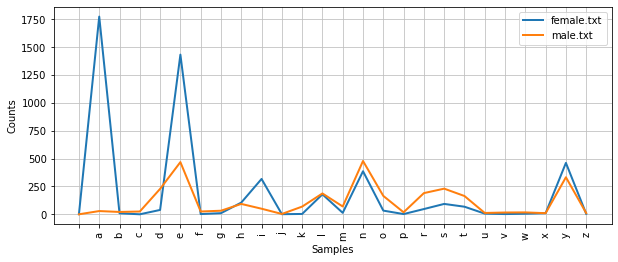

In [358]:
# Names ending letters frequency

import matplotlib.pyplot as plt

cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1]) 
    for fileid in names.fileids()
    for name in names.words(fileid))

plt.figure(figsize=(10, 4)) # optional; changes size of graph

cfd.plot()

### 4.2 - A Pronouncing Dictionary

In [ ]:
entries = nltk.corpus.cmudict.entries()
len(entries)

In [ ]:
for entry in entries[42371:42379]:
    print(entry)

In [ ]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron            # this is a triple pair
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

In [ ]:
syllable = ['N', 'IH0', 'K', 'S']

[word for word, pron in entries if pron[-4:] == syllable]

In [ ]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

In [ ]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

In [ ]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

In [ ]:
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

In [ ]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

In [ ]:
p3 = [(pron[0]+'-'+pron[2], word)
    for (word, pron) in entries
    if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)

for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

In [ ]:
prondict = nltk.corpus.cmudict.dict()

In [ ]:
prondict['fire']

In [ ]:
prondict['blog']

In [ ]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']]

In [ ]:
prondict['blog']

In [ ]:
text = ['natural', 'language', 'processing']

In [ ]:
[ph for w in text for ph in prondict[w][0]]

### 4.3 Comparitive Wordlists

In [ ]:
from nltk.corpus import swadesh

In [ ]:
swadesh.fileids()

In [ ]:
swadesh.words('en')

In [ ]:
fr2en = swadesh.entries(['fr', 'en'])

In [ ]:
fr2en

In [254]:
translate = dict(fr2en)

In [ ]:
translate['chien']

In [ ]:
translate['jeter']

In [ ]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))

In [ ]:
translate['Hund']

In [ ]:
translate['perro']

In [ ]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']

for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

### 4.4 Showbox and Toolbox Lexicons

In [209]:
from nltk.corpus import toolbox

toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

## 5 - WordNet

### 5.1 - Senses and Synonyms

In [210]:
from nltk.corpus import wordnet as wn

[Synset('car.n.01')]

In [218]:
wn.synsets('motorcar')

[Synset('car.n.01')]

In [219]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [220]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [221]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

#### Lemmas

In [222]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [223]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [224]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [225]:
wn.lemma('car.n.01.automobile').name()

'automobile'

In [226]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [227]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [228]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

**Your Turn:** Write down all the senses of the word *dish* that you can think of. Now, explore this word with the help of WordNet, using the same operations we used above.

### 5.2 - The WordNet Hierarchy

In [245]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [246]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [247]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [248]:
paths = motorcar.hypernym_paths()
len(paths)

2

In [249]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [250]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [251]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

**Your Turn:** Try out NLTK's convenient graphical WordNet browser: `nltk.app.wordnet()`. Explore the WordNet hierarchy by following the hypernym and hyponym links.

**Note:** This applet does not work in Jupyter Notebooks. Instead use the Princeton WordNet Search linked below. It has the same features as the NLTK app but is less buggy.


* [WordNet Search - 3.1](http://wordnetweb.princeton.edu/perl/webwn)

## Your Turn Solutions

### 1.3

**Your Turn:** Choose a different section of the Brown Corpus, and adapt the previous example to count a selection of wh words, such as what, when, where, who, and why.

In [ ]:
from nltk.corpus import brown

humor_text = brown.words(categories='humor')
humor_fdist = nltk.FreqDist(w.lower() for w in humor_text)
wh = ['what', 'when', 'where', 'who', 'why']

for w in wh:
    print(w + ':', fdist[m], end=' ')

### 1.7

**Your Turn:** Pick a language of interest in `udhr.fileids()`, and define a variable `raw_text = udhr.raw(Language-Latin1)`. Now plot a frequency distribution of the letters of the text using `nltk.FreqDist(raw_text).plot()`.

* in this example, I will choose `Portuguese_Portugues-Latin1`
* **note:** for this solution, I used matplotlib library functions to change the size of the graph
    * learn more about matplotlib here: [Intro to pyplot Tutorial](https://matplotlib.org/3.3.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

In [ ]:
from nltk.corpus import udhr

udhr.fileids()

In [ ]:
raw_text = udhr.raw('Portuguese_Portugues-Latin1')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6)) 

nltk.FreqDist(raw_text).plot()

### 2.3

**Your Turn:** Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called `days` containing a list of days of the week, i.e. `['Monday', ...]`. Now tabulate the counts for these words using `cfd.tabulate(samples=days)`. Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: `samples=['Monday', ...]`.

In [ ]:
from nltk.corpus import brown

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in ['news', 'romance']         
    for word in brown.words(categories=genre)
)

In [ ]:
cfd

In [ ]:
cfd.tabulate(samples=days)

In [ ]:
cfd.plot(samples=days)

### 5.1 

**Your Turn:** Write down all the senses of the word *dish* that you can think of. Now, explore this word with the help of WordNet, using the same operations we used above.

Examples of dishes:
1. dish as a plate (noun)
2. dish as a meal (noun)
3. dish as an electronic device (i.e. satellite dish) (noun)
4. to serve as a dish (verb)
4. to dish out (verb)

In [229]:
wn.lemmas('dish')

[Lemma('dish.n.01.dish'),
 Lemma('dish.n.02.dish'),
 Lemma('dish.n.03.dish'),
 Lemma('smasher.n.02.dish'),
 Lemma('dish.n.05.dish'),
 Lemma('cup_of_tea.n.01.dish'),
 Lemma('serve.v.06.dish'),
 Lemma('dish.v.02.dish')]

In [236]:
wn.lemma('dish.n.01.dish').synset().definition() # 1

'a piece of dishware normally used as a container for holding or serving food'

In [237]:
wn.lemma('dish.n.02.dish').synset().definition() # 2

'a particular item of prepared food'

In [240]:
wn.lemma('dish.n.05.dish').synset().definition() # 3

'directional antenna consisting of a parabolic reflector for microwave or radio frequency radiation'

In [242]:
wn.lemma('serve.v.06.dish').synset().definition() #4

'provide (usually but not necessarily food)'

In [241]:
wn.lemma('dish.v.02.dish').synset().definition() #5

'make concave; shape like a dish'

## Work

Ignore content below. This is for testing.

### 1.7

In [ ]:
import pandas as pd
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

def plot_freq(lang):
    max_length = max([len(word) for word in udhr.words(lang + '-Latin1')])
    eng_freq_dist = {}

    for i in range(max_length + 1):
        eng_freq_dist[i] = cfd[lang].freq(i)

    ed = pd.Series(eng_freq_dist, name=lang)

    ed.cumsum().plot(legend=True, title='Cumulative Distribution of Word Lengths')

In [ ]:
for lang in languages:
    plot_freq(lang)